In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [3]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('/Users/dclure/Projects/hist-vec/corpora/LemCorpCrit_models/{}.bin'.format(year)))
    for year in range(1820, 1940, 20)
])

In [4]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [5]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [6]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

poésie


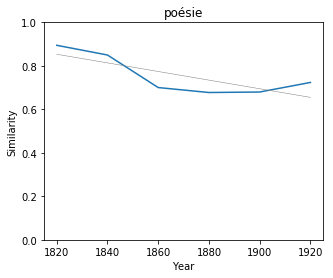

In [7]:
plot_cosine_series('littérature', 'poésie')

In [8]:
def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

In [9]:
union_vocab = union_neighbor_vocab('littérature')

In [10]:
data = []
for token in union_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [11]:
import pandas as pd

df1 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Increasing

In [12]:
pd.set_option('display.max_rows', 1000)

df1.sort_values('slope', ascending=False).head(50)

,token,slope,p
255,humanisme,0.008528,0.008731
402,mentalité,0.007059,0.038732
239,sociologie,0.006669,0.024114
302,apport,0.006484,0.004768
63,éthique,0.006427,0.004038
494,professionnel,0.006414,0.005583
457,adaptation,0.006290,0.012927
64,orientation,0.006222,0.017795
519,symboliste,0.006036,0.011135
333,fédéralisme,0.005919,0.074813


humanisme


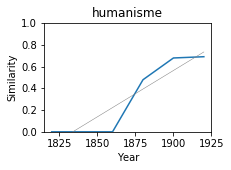

mentalité


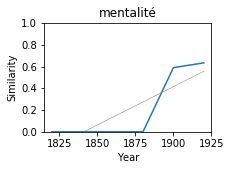

sociologie


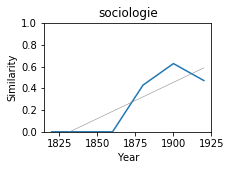

apport


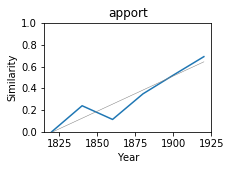

éthique


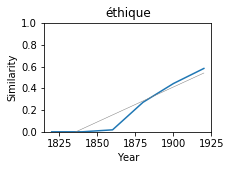

professionnel


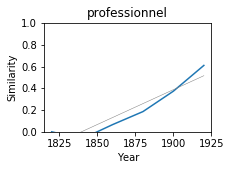

adaptation


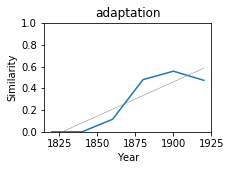

orientation


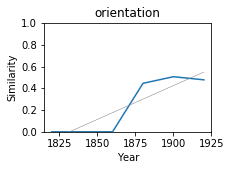

symboliste


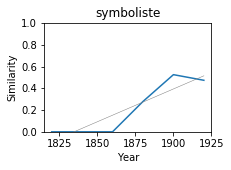

fédéralisme


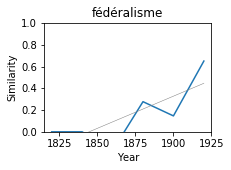

réaliste


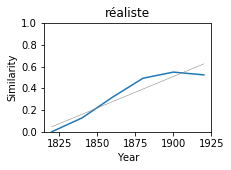

classicisme


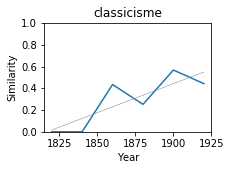

individualisme


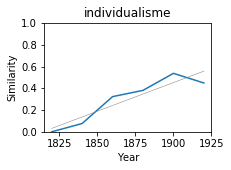

artistique


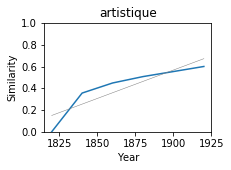

psychologue


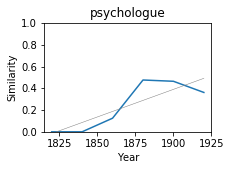

théoricien


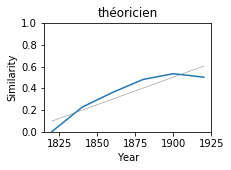

welschinger


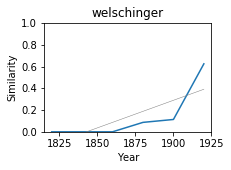

lyrisme


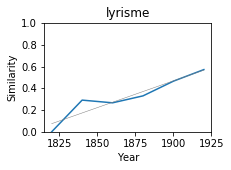

maniere


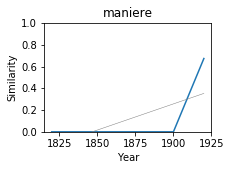

hennet


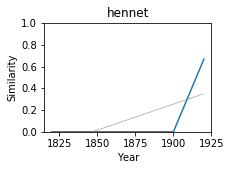

In [13]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

# Decreasing

In [14]:
df1.sort_values('slope', ascending=True).head(50)

,token,slope,p
303,chaldéen,-0.006042,0.014349
404,septante,-0.005784,0.054396
334,transplantation,-0.005606,0.109092
454,choeur,-0.005519,0.159394
102,philé,-0.005426,0.158302
532,pannonie,-0.005413,0.152058
458,tirer,-0.005310,0.136123
125,destination,-0.005293,0.017138
260,morceau,-0.005033,0.032446
430,diviniser,-0.004939,0.160054


chaldéen


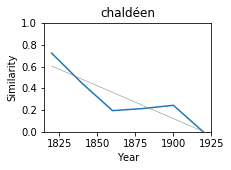

septante


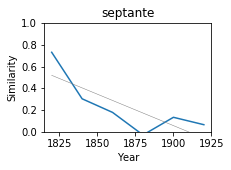

transplantation


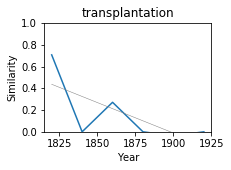

choeur


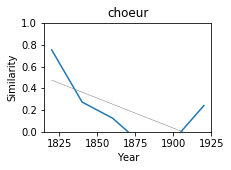

philé


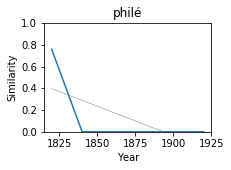

pannonie


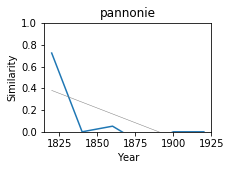

tirer


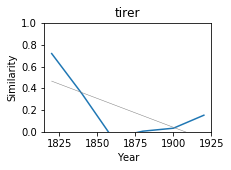

destination


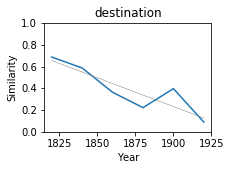

morceau


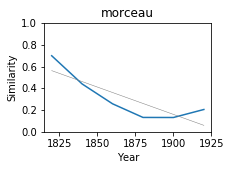

diviniser


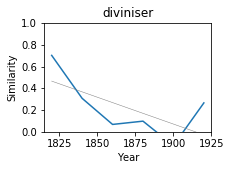

scène


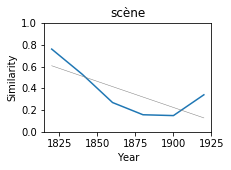

marche


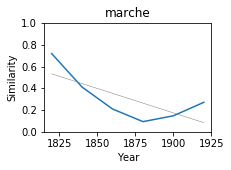

romance


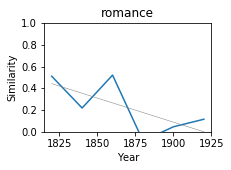

héraclite


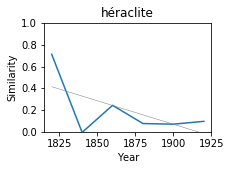

homère


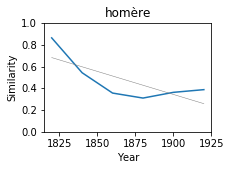

précéder


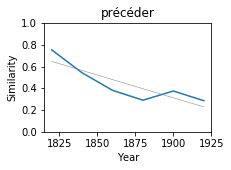

acteur


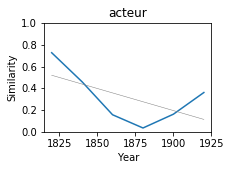

différent


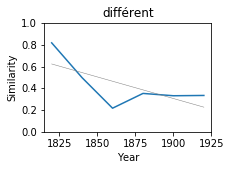

prologue


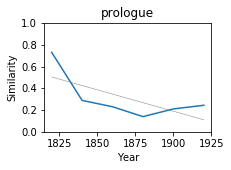

poème


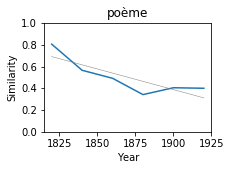

In [15]:
for i, row in df1.sort_values('slope', ascending=True).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

In [16]:
def intersect_neighbor_vocab(anchor, topn=2000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar]))
        
    return set.intersection(*vocabs)

In [17]:
intersect_vocab = intersect_neighbor_vocab('littérature')

In [18]:
data = []
for token in intersect_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    if fit.pvalues[1] < 0.05:
        data.append((token, fit.params[1], fit.pvalues[1]))

In [19]:
import pandas as pd

df2 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Intersected neighbors

In [20]:
df2.sort_values('slope', ascending=False)

,token,slope,p
11,culture,0.002757,0.007773
19,renaissance,0.002433,0.000671
24,goût,-0.001155,0.012860
12,résumé,-0.001584,0.033721
1,recherche,-0.001631,0.034747
13,traduction,-0.001667,0.041989
22,version,-0.001856,0.030805
2,spéculation,-0.001864,0.029492
5,dialecte,-0.001944,0.013789
9,original,-0.001986,0.041103


culture


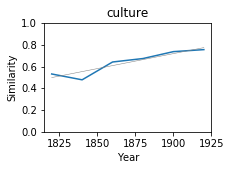

renaissance


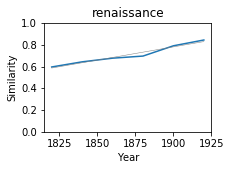

goût


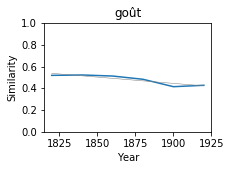

résumé


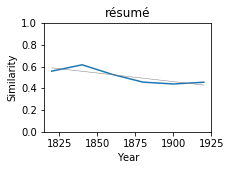

recherche


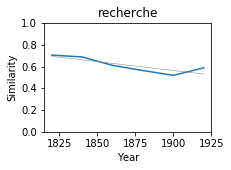

traduction


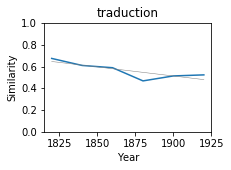

version


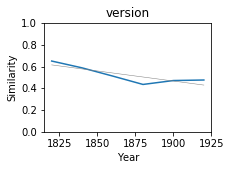

spéculation


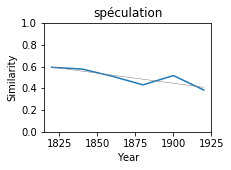

dialecte


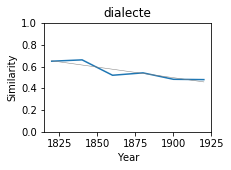

original


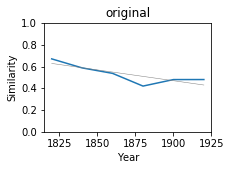

comparaison


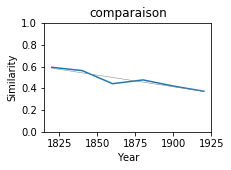

primitif


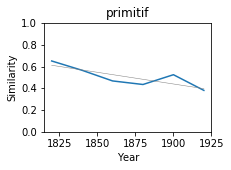

phase


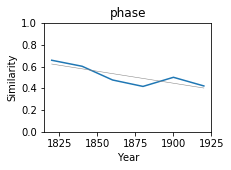

faculté


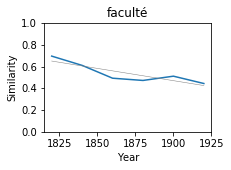

oriental


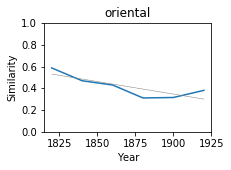

savant


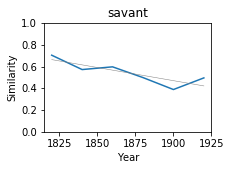

cours


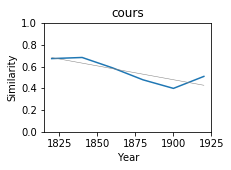

cité


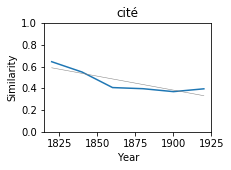

monument


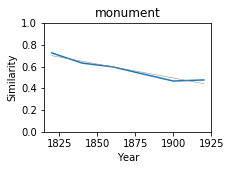

éloquence


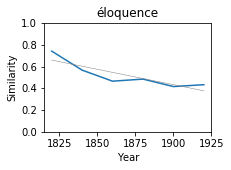

commentaire


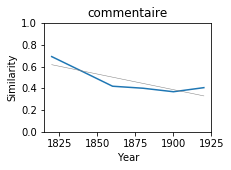

chevalerie


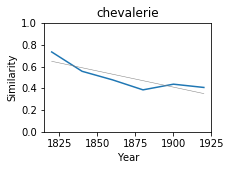

poète


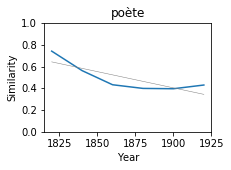

anatomie


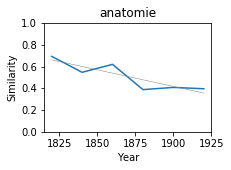

poème


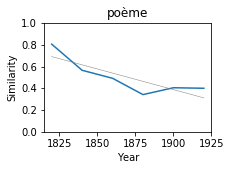

In [21]:
for i, row in df2.sort_values('slope', ascending=False).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)